### Dataset descripton

About ten years' worth of daily weather measurements from several sites across Australia are included in this collection.  
The target variable to be predicted is RainTomorrow. Does it mean that it rained the following day, Yes or No?   
If the amount of rain that day was 1 mm or greater, the column is set to Yes.  
There are 23 columns and 145460 rows


### Import required libraries 

In [1]:
import numpy as np
import pandas as pd
import copy

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)

In [3]:
from sklearn.preprocessing import LabelEncoder

### Reading the file 

In [4]:
df = pd.read_csv("weatherAUS.csv")

In [5]:
#checking the data
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### Summary of the dataset

In [6]:
# Statistical Summary 
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [7]:
# Dataset Summary 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [8]:
# All the column Names
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [9]:
#No of rows and columns
df.shape

(145460, 23)

### Data preprocessing

In [10]:
#Checking the null values

df.isnull().sum().sort_values(ascending=False) 

Sunshine         69835
Evaporation      62790
Cloud3pm         59358
Cloud9am         55888
Pressure9am      15065
Pressure3pm      15028
WindDir9am       10566
WindGustDir      10326
WindGustSpeed    10263
Humidity3pm       4507
WindDir3pm        4228
Temp3pm           3609
RainTomorrow      3267
Rainfall          3261
RainToday         3261
WindSpeed3pm      3062
Humidity9am       2654
Temp9am           1767
WindSpeed9am      1767
MinTemp           1485
MaxTemp           1261
Location             0
Date                 0
dtype: int64

1. Almost all the columns have some null.
2. Date column is present so we can extract month and year from it
3. Some of the columns are not required

As per the above reasons pre-processing is required for the dataset

In [11]:
# Checking the percentage of the null values in each columns 
print("Percentages of Null values in the dataset\n")
df_n = 100 * df.isnull().sum() / df.shape[0]
print(df_n.sort_values(ascending=False))

Percentages of Null values in the dataset

Sunshine         48.009762
Evaporation      43.166506
Cloud3pm         40.807095
Cloud9am         38.421559
Pressure9am      10.356799
Pressure3pm      10.331363
WindDir9am        7.263853
WindGustDir       7.098859
WindGustSpeed     7.055548
Humidity3pm       3.098446
WindDir3pm        2.906641
Temp3pm           2.481094
RainTomorrow      2.245978
Rainfall          2.241853
RainToday         2.241853
WindSpeed3pm      2.105046
Humidity9am       1.824557
Temp9am           1.214767
WindSpeed9am      1.214767
MinTemp           1.020899
MaxTemp           0.866905
Location          0.000000
Date              0.000000
dtype: float64


### Processing the null values in numerical columns

In [12]:
num_var = df.select_dtypes(exclude=['object']).columns.tolist()
print(f"No of numerical variables {len(num_var)}")
print("List of numerical variables:", num_var)

No of numerical variables 16
List of numerical variables: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


C:\Users\Radhey\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



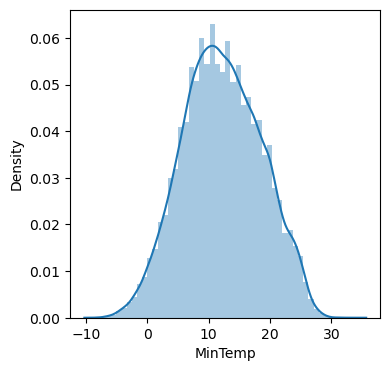

C:\Users\Radhey\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



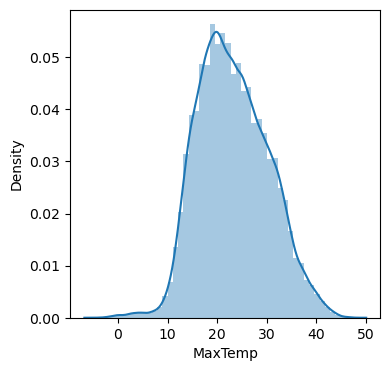

C:\Users\Radhey\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



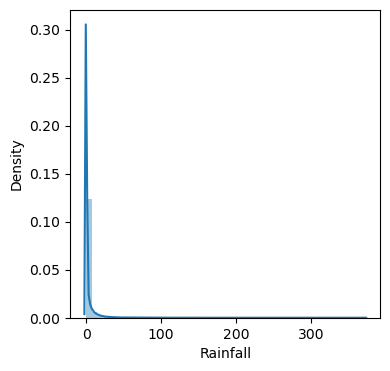

C:\Users\Radhey\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



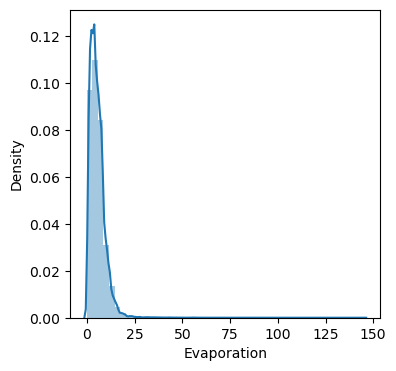

C:\Users\Radhey\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



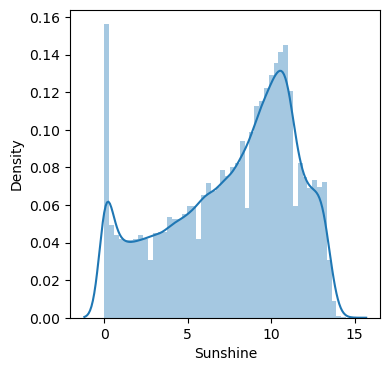

C:\Users\Radhey\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



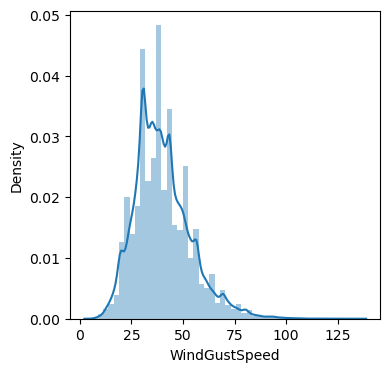

C:\Users\Radhey\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



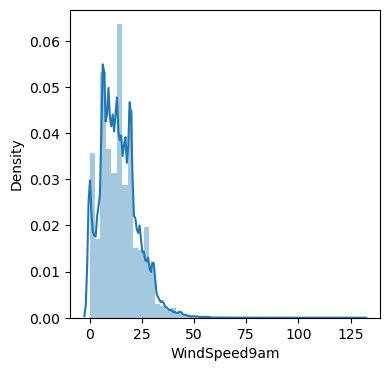

C:\Users\Radhey\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



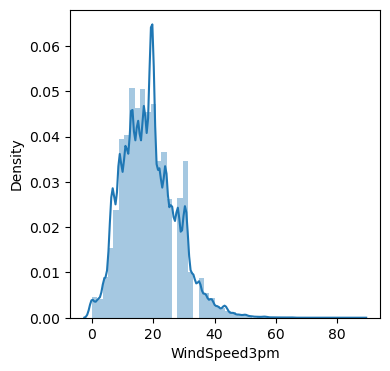

C:\Users\Radhey\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



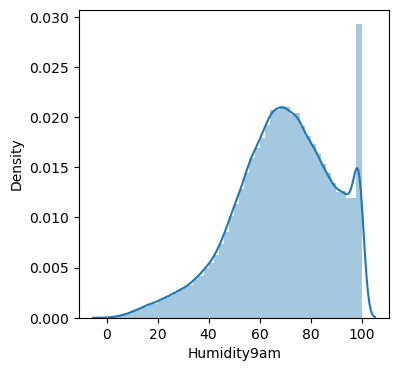

C:\Users\Radhey\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



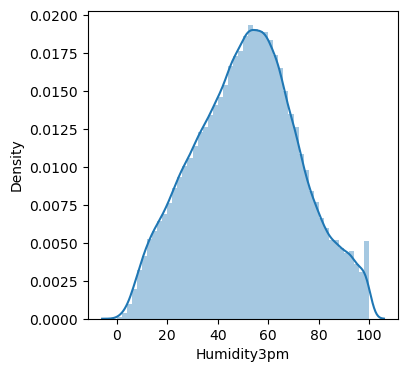

C:\Users\Radhey\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



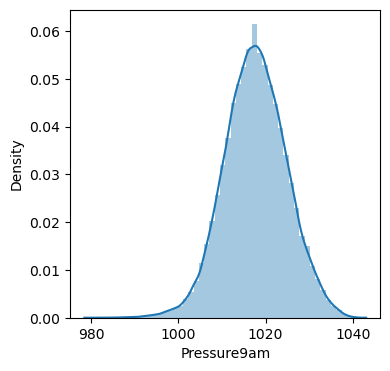

C:\Users\Radhey\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



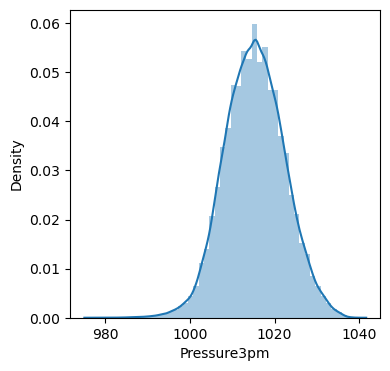

C:\Users\Radhey\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



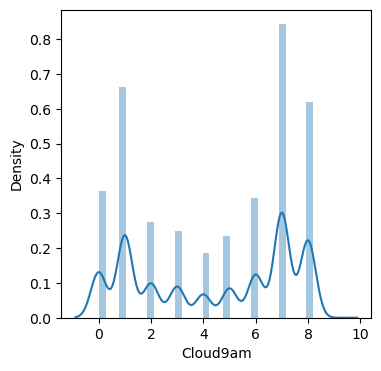

C:\Users\Radhey\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



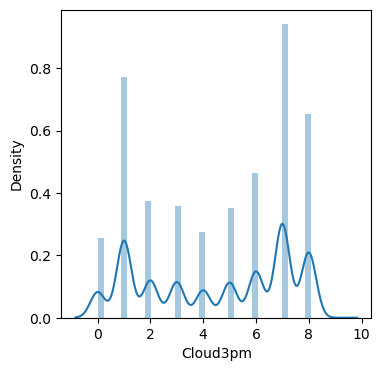

C:\Users\Radhey\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



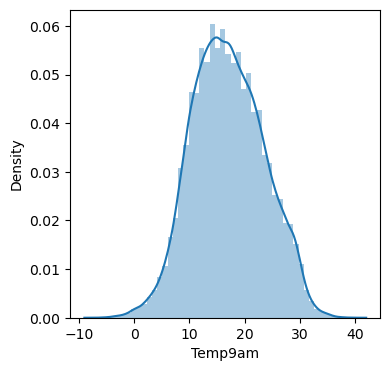

C:\Users\Radhey\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



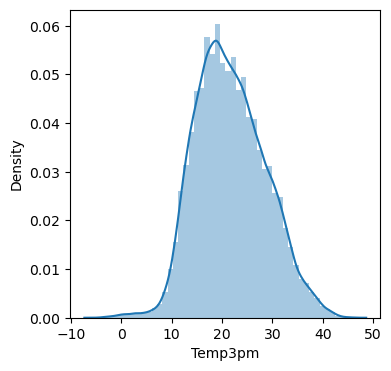

In [13]:
for col in df[num_var].columns:
    plt.figure(figsize=(4,4))
    sns.distplot(x=df[col],kde=True)
    plt.xlabel(col)
    plt.show()

In [14]:

#Filling the missing values with median
for columns in num_var:
    column_med = df[columns].median() 
    df[columns].fillna(column_med, inplace=True)

### Processing the null values in Categorical columns

In [15]:
cat_var = df.select_dtypes(include=['object']).columns.tolist()
print(f"No of categorical variables {len(cat_var)}")
print("List of categorical variables are:", cat_var)

No of categorical variables 7
List of categorical variables are: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [16]:
# Fill missing values with mode for each categorical variable
for var in cat_var:
    mode_value = df[var].mode().iloc[0]
    df[var].fillna(mode_value, inplace=True)

In [17]:
#Checking the null values after imputation

df.isnull().sum().sort_values(ascending=False) 

Date             0
WindSpeed3pm     0
RainToday        0
Temp3pm          0
Temp9am          0
Cloud3pm         0
Cloud9am         0
Pressure3pm      0
Pressure9am      0
Humidity3pm      0
Humidity9am      0
WindSpeed9am     0
Location         0
WindDir3pm       0
WindDir9am       0
WindGustSpeed    0
WindGustDir      0
Sunshine         0
Evaporation      0
Rainfall         0
MaxTemp          0
MinTemp          0
RainTomorrow     0
dtype: int64

## Exploratory Data Analysis

#### EDA on Categorical variables

In [18]:
cat_var = df.select_dtypes(include=['object']).columns.tolist()
print(f"No of categorical variables {len(cat_var)}")
print("List of categorical variables are:", cat_var)

No of categorical variables 7
List of categorical variables are: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [19]:
df[cat_var].isnull().sum()

Date            0
Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

### Analysis of the variables

In [20]:
print(" ")
print("**********")
print(f'Exploring the target vairable')
print(" ")
var = df['RainTomorrow'].unique()
print('RainTomorrow', ' has ', len(var), ' unique values.')
print(" ")
print(df['RainTomorrow'].unique())
print(" ")
print(f'Unique values frequency in RainTomorrow')
print(df['RainTomorrow'].value_counts())
print(" ")
print(f'View the frequency distribution of RainTomorrow in percentages ')
print(100*(df['RainTomorrow'].value_counts()/len(df)))

 
**********
Exploring the target vairable
 
RainTomorrow  has  2  unique values.
 
['No' 'Yes']
 
Unique values frequency in RainTomorrow
No     113583
Yes     31877
Name: RainTomorrow, dtype: int64
 
View the frequency distribution of RainTomorrow in percentages 
No     78.085384
Yes    21.914616
Name: RainTomorrow, dtype: float64


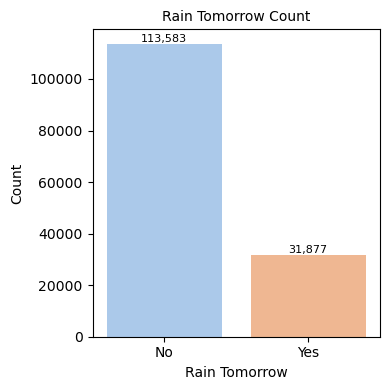

In [23]:
# Create the countplot
plt.figure(figsize=(4, 4))
ax = sns.countplot(x="RainTomorrow", data=df, palette="pastel")

# Add labels and title
ax.set_xlabel("Rain Tomorrow", fontsize=10)
ax.set_ylabel("Count", fontsize=10)
ax.set_title("Rain Tomorrow Count", fontsize=10)

# Add value counts above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

#### Finding of the target variable

The target variable Rain Tomorrow is categorical variable.  
It has 2 unique values.  
The unique values are of binary nature that is Yes or No.  
The frequency of No is 78.08% ,113583 values and Yes is 21.91 %  , 31,877 values.  

In [23]:
#Eda on other categorical variables
df[cat_var].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [24]:
df[cat_var].columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [25]:
for cols in cat_var:
    print(" ")
    print("**********")
    print(f'Exploring {cols}')
    print(" ")
    var = df[cols].unique()
    print(cols, ' has ', len(var), ' unique values.')
    print(" ")
    print(df[cols].unique())
    print(" ")
    print(f'Unique values frequency in {cols}')
    print(df[cols].value_counts())
    print(" ")
    print(f'View the frequency distribution of {cols} in percentages ')
    print(100*(df[cols].value_counts()/len(df)))

 
**********
Exploring Date
 
Date  has  3436  unique values.
 
['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31']
 
Unique values frequency in Date
2013-11-12    49
2014-09-01    49
2014-08-23    49
2014-08-24    49
2014-08-25    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: Date, Length: 3436, dtype: int64
 
View the frequency distribution of Date in percentages 
2013-11-12    0.033686
2014-09-01    0.033686
2014-08-23    0.033686
2014-08-24    0.033686
2014-08-25    0.033686
                ...   
2007-11-29    0.000687
2007-11-28    0.000687
2007-11-27    0.000687
2007-11-26    0.000687
2008-01-31    0.000687
Name: Date, Length: 3436, dtype: float64
 
**********
Exploring Location
 
Location  has  49  unique values.
 
['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtow

In [26]:
### 1. Count Plot for 'Location'

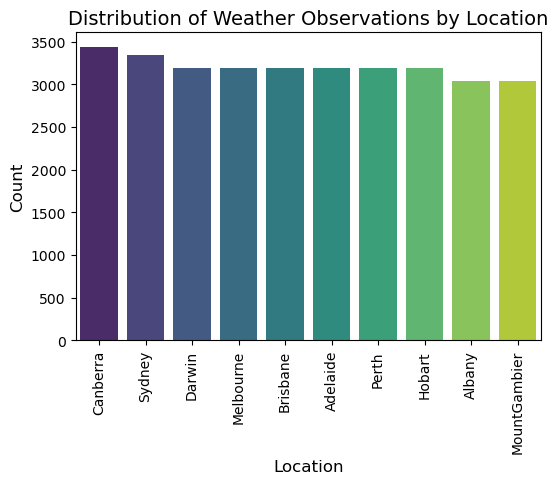

In [28]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Location', order=df['Location'].value_counts().head(10).index, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Weather Observations by Location', fontsize=14)
plt.show()

The distribution of weather observations across several locations is displayed by the count plot. The dataset's regional representation may be impacted by not much as most of the loaction count is above 3000.  
Highest are canberra and sydney

In [28]:
### 2. Count Plot for 'WindGustDir'

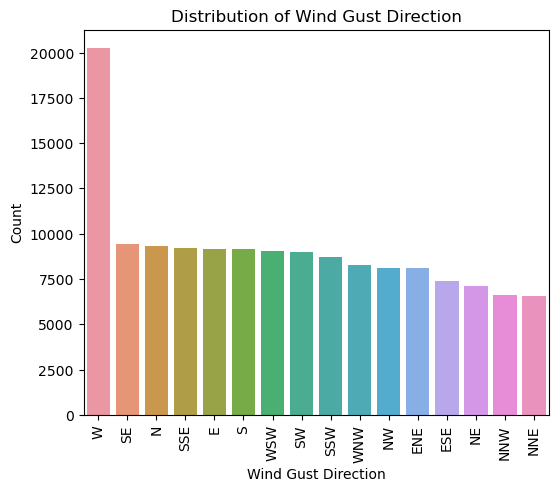

In [29]:
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='WindGustDir', order=df['WindGustDir'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Wind Gust Direction')
plt.ylabel('Count')
plt.title('Distribution of Wind Gust Direction')
plt.show()

The frequency of the direction with the strongest recorded wind gusts is shown on the count plot. It displays the wind directions that are observed to be most frequently.

Wind Gust flow direction is hightest from the west
And its similar for all the other direction ranging from a count of 6000 to 10000

In [30]:
### 3.Count Plot for 'WindDir9am' and 'WindDir3pm'

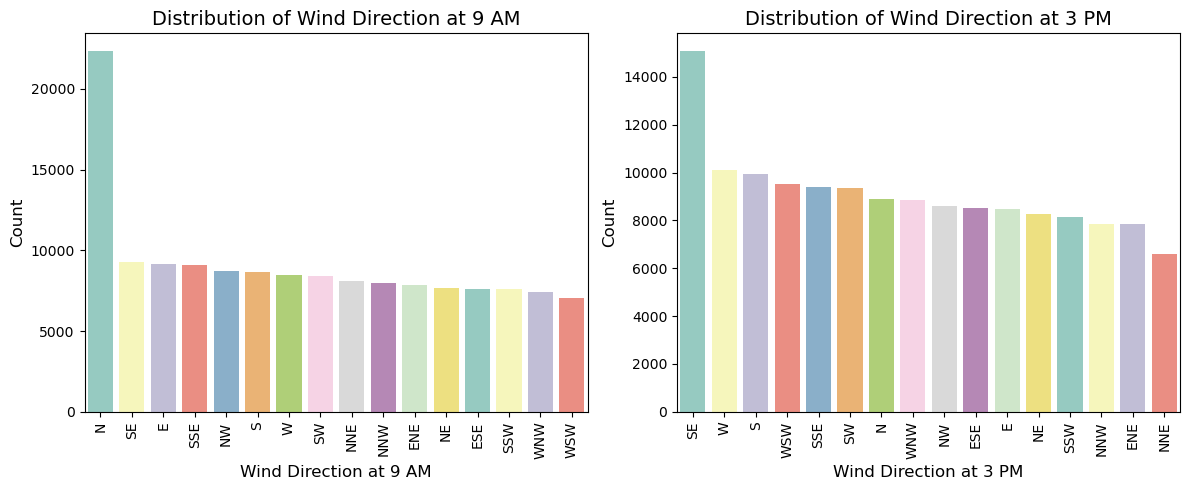

In [31]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='WindDir9am', order=df['WindDir9am'].value_counts().index, palette='Set3')
plt.xticks(rotation=90)
plt.xlabel('Wind Direction at 9 AM', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Wind Direction at 9 AM', fontsize=14)

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='WindDir3pm', order=df['WindDir3pm'].value_counts().index, palette='Set3')
plt.xticks(rotation=90)
plt.xlabel('Wind Direction at 3 PM', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Wind Direction at 3 PM', fontsize=14)

plt.tight_layout()
plt.show()

Compare the wind directions at 9 AM and 3 PM with these count charts. It sheds light on how the direction of the wind varies throughout the day.  
Wind direction is highest from North at 9am and south east at 3 pm.

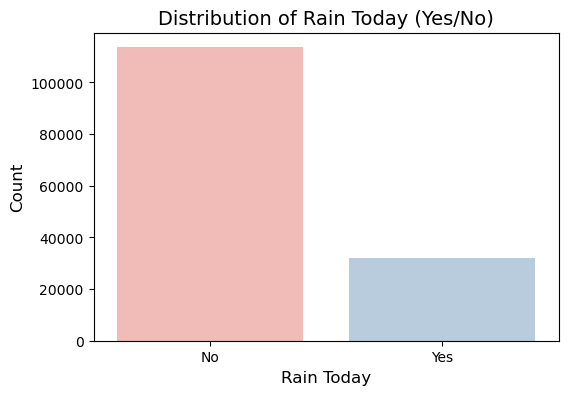

In [32]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='RainToday', palette='Pastel1')
plt.xlabel('Rain Today', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Rain Today (Yes/No)', fontsize=14)
plt.show()

### Eda on numerical variables

In [33]:
num_var = df.select_dtypes(exclude=['object']).columns.tolist()
print(f"No of numerical variables {len(num_var)}")
print("List of numerical variables:", num_var)

No of numerical variables 16
List of numerical variables: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


### Distribution Plot for 'MinTemp' and 'MaxTemp'

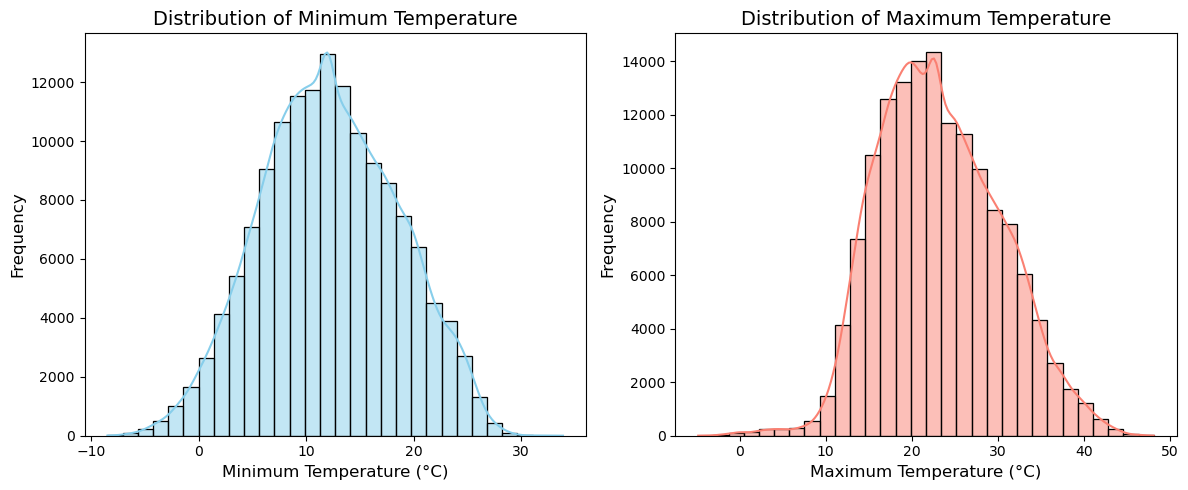

In [30]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='MinTemp', bins=30, kde=True, color='skyblue')
plt.xlabel('Minimum Temperature (°C)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Minimum Temperature', fontsize=14)

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='MaxTemp', bins=30, kde=True, color='salmon')
plt.xlabel('Maximum Temperature (°C)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Maximum Temperature', fontsize=14)

plt.tight_layout()
plt.show()

The minimum and maximum temperature distribution is displayed in the distribution graphs. The distributions seem to be fairly normal.

### Pair plot for the select numerical variables

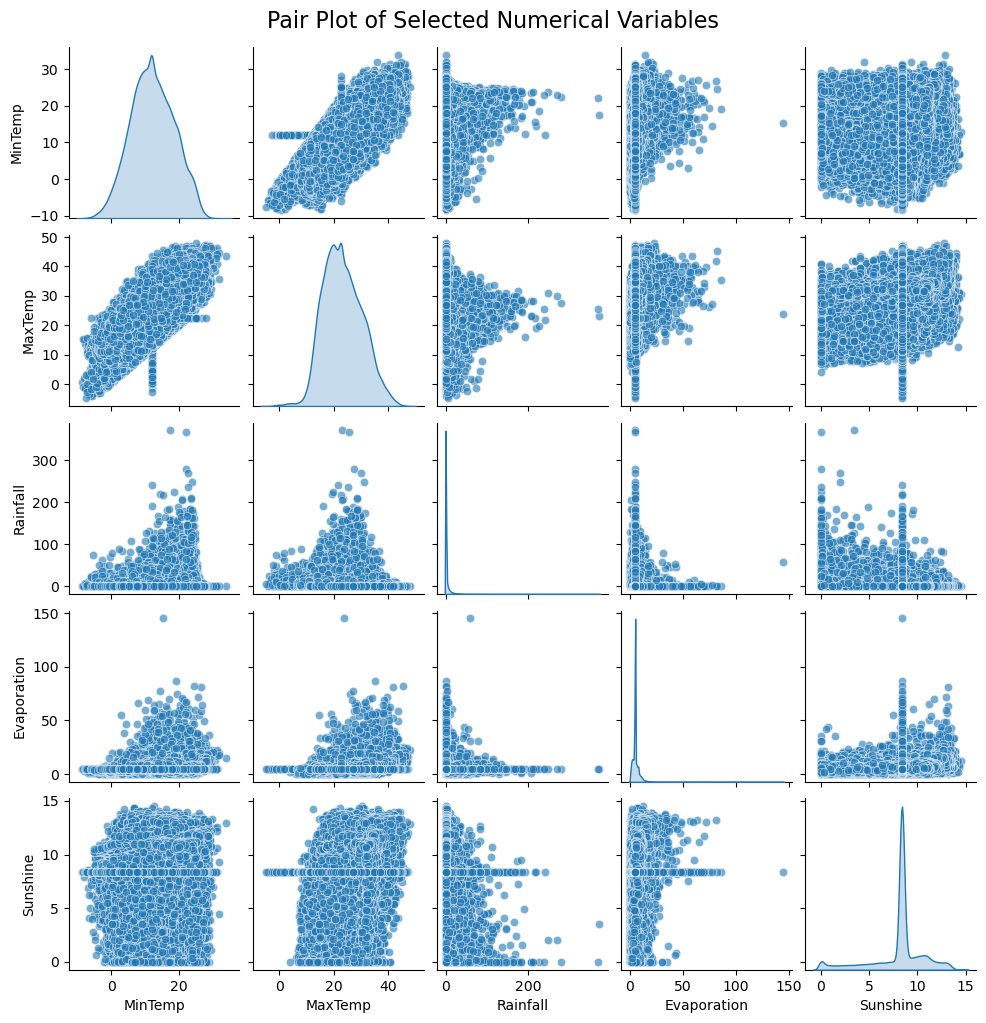

In [33]:
numerical_vars = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine']
sns.pairplot(data=df[numerical_vars], diag_kind='kde', plot_kws={'alpha': 0.6}, height=2)
plt.suptitle('Pair Plot of Selected Numerical Variables', fontsize=16, y=1.02)
plt.show()

<Figure size 800x400 with 0 Axes>

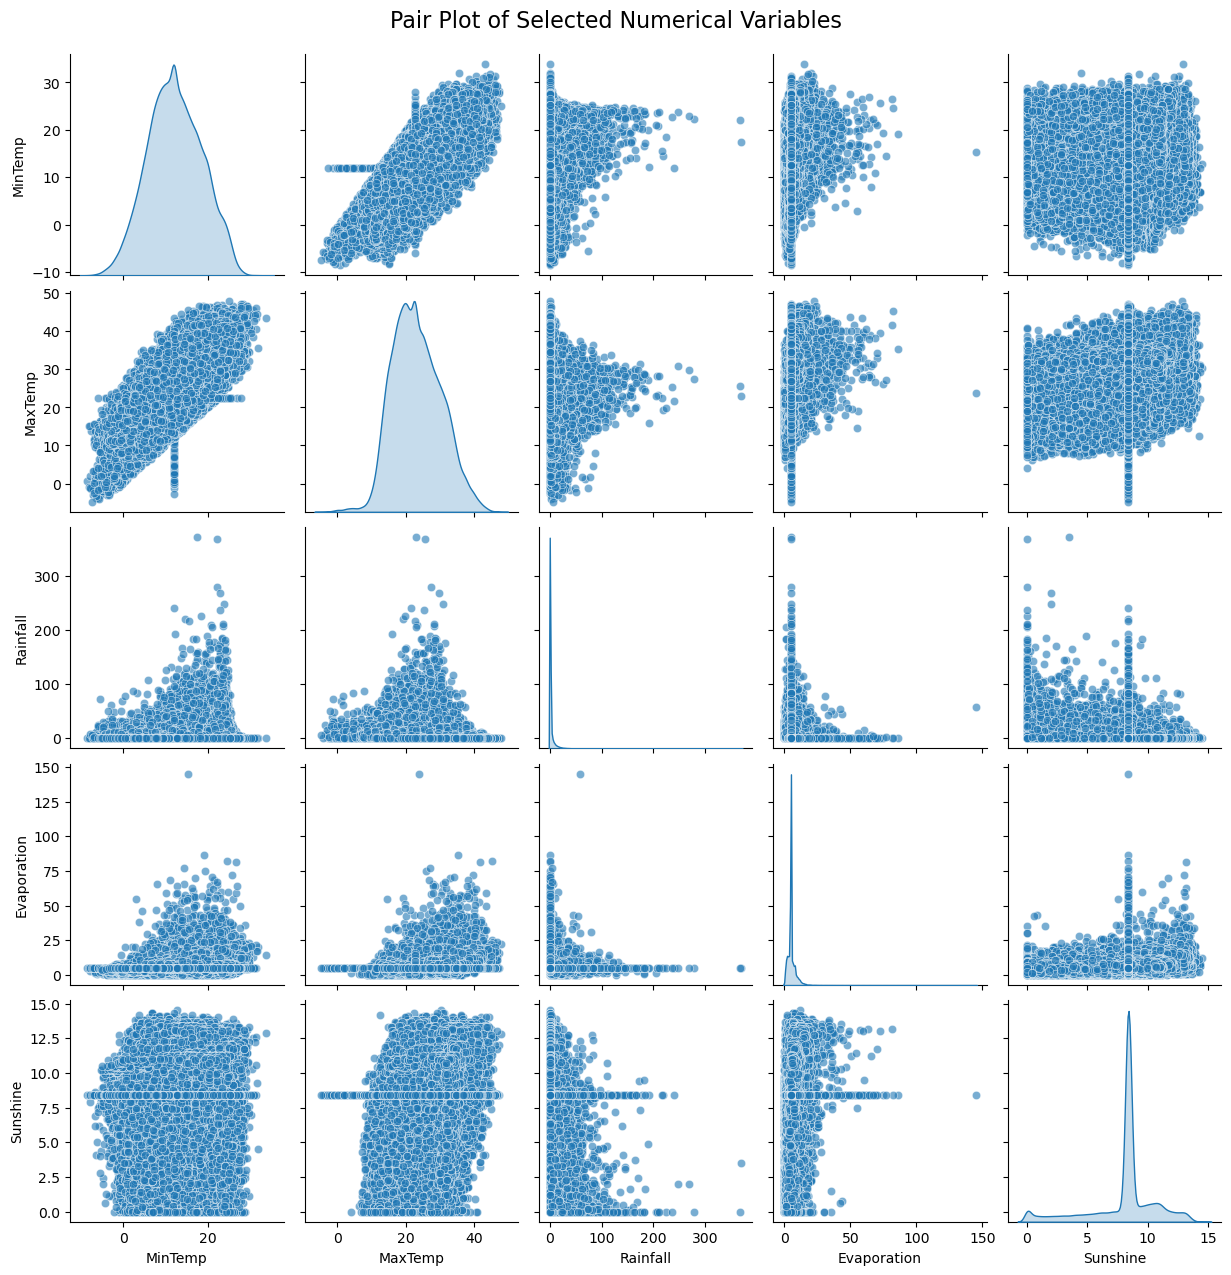

In [32]:
numerical_vars = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine']
sns.pairplot(data=df[numerical_vars], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot of Selected Numerical Variables', fontsize=16, y=1.02)
plt.show()

### Correlation Heatmap

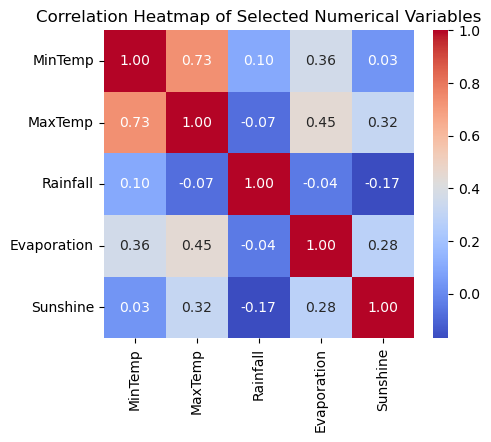

In [36]:
plt.figure(figsize=(5, 4))
correlation_matrix = df[numerical_vars].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Selected Numerical Variables', fontsize=12)
plt.show()

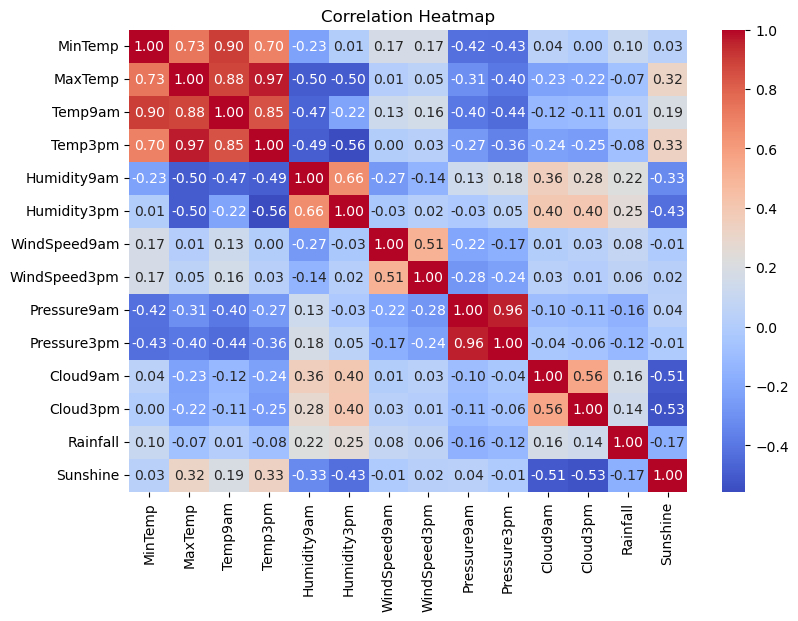

In [45]:
# Define a list of important variables
important_variables = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'Humidity9am', 'Humidity3pm',
                       'WindGustDir', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
                       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Rainfall', 'Location', 'Sunshine']

# Create a DataFrame with only the important variables
data_subset = df[important_variables]

# Calculate the correlation matrix
correlation_matrix = data_subset.corr()

# Create a heatmap
plt.figure(figsize=(9, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [52]:
# Define Wind Direction labels
Wind_dir = ['E', 'ENE', 'NE', 'NNE', 'N', 'NNW', 'NW', 'WNW', 'W', 'WSW', 'SW', 'SSW', 'S', 'SSE', 'SE', 'ESE']

# Create a subplot with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Define data for Rainfall and Evaporation
rainfall_data = [
    {'data': df.groupby('WindDir9am')['Rainfall'].mean(), 'name': 'Rainfall 9am', 'color': 'royalblue', 'dash': 'solid'},
    {'data': df.groupby('WindDir3pm')['Rainfall'].mean(), 'name': 'Rainfall 3pm', 'color': 'skyblue', 'dash': 'dot'}
]

evaporation_data = [
    {'data': df.groupby('WindDir3pm')['Evaporation'].mean(), 'name': 'Evaporation 3pm', 'color': 'darkgray', 'dash': 'dot'},
    {'data': df.groupby('WindDir9am')['Evaporation'].mean(), 'name': 'Evaporation 9am', 'color': 'darkgray', 'dash': 'dot'}
]

# Add traces for Rainfall
for data_entry in rainfall_data:
    fig.add_trace(go.Scatter(
        y=data_entry['data'],
        x=Wind_dir,
        name=data_entry['name'],
        line=dict(color=data_entry['color'], width=2, dash=data_entry['dash'])
    ))

# Add traces for Evaporation on secondary y-axis
for data_entry in evaporation_data:
    fig.add_trace(go.Scatter(
        y=data_entry['data'],
        x=Wind_dir,
        name=data_entry['name'],
        line=dict(color=data_entry['color'], width=2, dash=data_entry['dash'])
    ), secondary_y=True)

# Update layout and show the plot
fig.update_layout(
    title='<b>Rainfall & Evaporation vs Wind Direction</b>',
    xaxis_title='<b>Wind Direction</b>',
    yaxis_title='<b>Rainfall [mm]</b>',
    titlefont={'size': 24, 'family': 'Arial'},
    template='plotly_dark',
    showlegend=True,
    paper_bgcolor='#222',
    plot_bgcolor='#333',
    width=710, height=400,
    font=dict(color='white')
)
fig.update_yaxes(title_text="<b>Evaporation [mm]</b>", secondary_y=True)

fig.show()

## Feature engineering

In [38]:
df_fe = copy.deepcopy(df)

### Feature Extraction

In [39]:
# 'Date' column is in the correct format
df_fe['Date'] = pd.to_datetime(df_fe['Date'], format='%Y-%m-%d')

# Extract date components and drop 'Date' column
df_fe = df_fe.assign(
    Year=df_fe['Date'].dt.year,
    Month=df_fe['Date'].dt.month,
    Day=df_fe['Date'].dt.day
).drop('Date', axis=1)



In [40]:
df_fe.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,WNW,...,1007.1,8.0,5.0,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,WSW,...,1007.8,5.0,5.0,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,WSW,...,1008.7,5.0,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,E,...,1012.8,5.0,5.0,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


### Binning the rainfall column by converting it into categorical

In [41]:
# Bin the 'Rainfall' feature into categories
bins = [-0.1, 1, 5, 10, df_fe['Rainfall'].max()]
labels = ['Light', 'Moderate', 'Heavy', 'Very Heavy']
df_fe['RainfallCategory'] = pd.cut(df_fe['Rainfall'], bins=bins, labels=labels)

### Encoding the categorical variable

In [42]:
df_encoded = pd.get_dummies(df_fe, columns=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], drop_first=True)

In [43]:
df_encoded.shape

(145460, 115)

In [44]:
df_encoded.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,4.8,8.4,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,4.8,8.4,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,4.8,8.4,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,4.8,8.4,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,4.8,8.4,41.0,7.0,20.0,82.0,33.0,...,0,1,0,0,0,0,0,0,0,0


In [45]:
#df_encoded.to_excel('outputtest', index=False)

In [46]:
# Defining custom labels where 'Very Heavy' has the highest rank
label_mapping = {'Very Heavy': 3, 'Heavy': 2, 'Moderate': 1, 'Light': 0}

label_encoder = LabelEncoder()
label_encoder.classes_ = [label for label, rank in sorted(label_mapping.items(), key=lambda x: x[1])]

# Encode the 'rating_text' column using the LabelEncoder
df_encoded['RainfallCategory'] = label_encoder.transform(df_encoded['RainfallCategory'])


In [47]:
df_encoded['RainToday'].value_counts()

No     113580
Yes     31880
Name: RainToday, dtype: int64

In [48]:
df_encoded['RainTomorrow'].value_counts()

No     113583
Yes     31877
Name: RainTomorrow, dtype: int64

In [49]:
mapping = {'Yes': 1, 'No': 0}

# Apply the mapping to the columns
df_encoded['RainTomorrow'] = df_encoded['RainTomorrow'].map(mapping)
df_encoded['RainToday'] = df_encoded['RainToday'].map(mapping)


In [50]:
df_encoded['RainToday'].value_counts()

0    113580
1     31880
Name: RainToday, dtype: int64

In [51]:
df_encoded['RainTomorrow'].value_counts()

0    113583
1     31877
Name: RainTomorrow, dtype: int64

In [52]:
df_model = copy.deepcopy(df_encoded)

### Splitting the dataset

In [53]:
X = df_model.drop(['RainTomorrow'], axis=1)
y = df_model['RainTomorrow']

In [54]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(116368, 114) (116368,)
(29092, 114) (29092,)


### Training the models

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [56]:
# Create a linear regression model
model_logreg_1 = LogisticRegression(solver='liblinear', random_state=0)

# Train the model on the training data
model_logreg_1.fit(X_train, y_train)

# Make predictions on the testing data
y_predict = model_logreg_1.predict(X_test)

In [57]:
print(classification_report(y_test, y_predict))

print(confusion_matrix(y_test, y_predict))

# Accuracy score
LR_SC = accuracy_score(y_predict,y_test)
print(f"{round(LR_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     22726
           1       0.72      0.48      0.58      6366

    accuracy                           0.85     29092
   macro avg       0.80      0.72      0.74     29092
weighted avg       0.84      0.85      0.84     29092

[[21556  1170]
 [ 3285  3081]]
84.69% Accurate


In [58]:
from sklearn.naive_bayes import GaussianNB

In [59]:
# Create a GaussianNB instance
GB = GaussianNB()

# Fit the model to the training data
GB.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_predict = GB.predict(X_test)

In [60]:
print(classification_report(y_test, y_predict))

print(confusion_matrix(y_test, y_predict))

# Accuracy score
GB_SC = accuracy_score(y_predict,y_test)
print(f"{round(GB_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.89      0.65      0.75     22726
           1       0.36      0.71      0.48      6366

    accuracy                           0.66     29092
   macro avg       0.62      0.68      0.61     29092
weighted avg       0.77      0.66      0.69     29092

[[14753  7973]
 [ 1857  4509]]
66.21% Accurate


In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
knn = KNeighborsClassifier(n_neighbors=7)
  
knn.fit(X_train, y_train)

y_predict = knn.predict(X_test)

In [63]:
#  prediction Summary
print(classification_report(y_test, y_predict))


print(confusion_matrix(y_test, y_predict))

# Accuracy score
knn_SC = accuracy_score(y_predict,y_test)
print(f"{round(knn_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     22726
           1       0.69      0.48      0.57      6366

    accuracy                           0.84     29092
   macro avg       0.78      0.71      0.73     29092
weighted avg       0.83      0.84      0.83     29092

[[21388  1338]
 [ 3320  3046]]
83.99% Accurate


In [64]:
from sklearn.svm import SVC

In [65]:
svm_classifier = SVC(kernel='poly')  

svm_classifier.fit(X_train, y_train)

y_predict = svm_classifier.predict(X_test)


In [66]:
#  prediction Summary
print(classification_report(y_test, y_predict))

print(confusion_matrix(y_test, y_predict))

# Accuracy score
SVM_SC = accuracy_score(y_predict,y_test)
print(f"{round(SVM_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.83      0.98      0.90     22726
           1       0.80      0.31      0.44      6366

    accuracy                           0.83     29092
   macro avg       0.82      0.64      0.67     29092
weighted avg       0.83      0.83      0.80     29092

[[22236   490]
 [ 4424  1942]]
83.11% Accurate


In [67]:
score = [LR_SC,knn_SC,GB_SC,SVM_SC]
Models = pd.DataFrame({
    'Model': ["Logistic Regression","k-Nearest Neighbors", "GaussianNB","SVM"],
    'Score': score})
Models

,Model,Score
0,Logistic Regression,0.846865
1,k-Nearest Neighbors,0.839887
2,GaussianNB,0.662106
3,SVM,0.831088


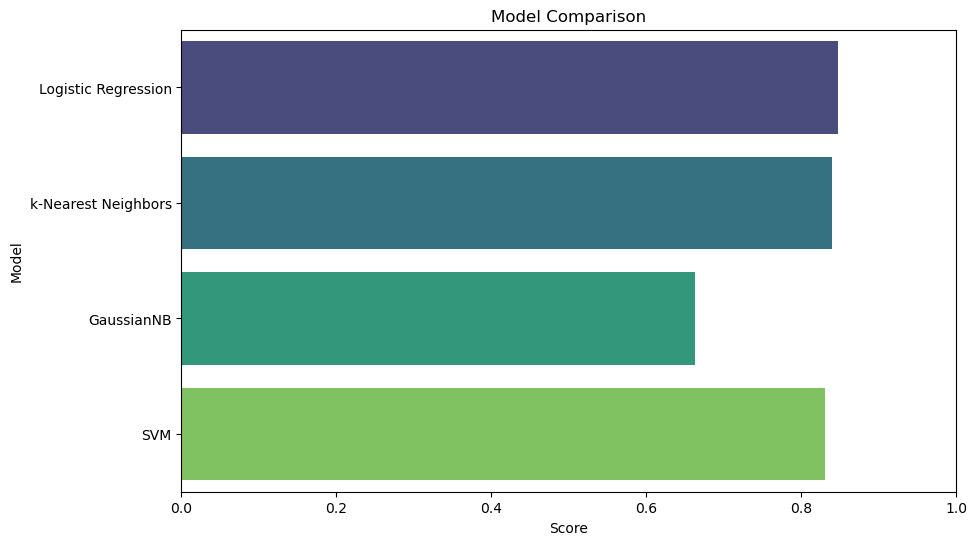

In [68]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=Models, x='Score', y='Model', palette='viridis')
plt.xlabel('Score')
plt.ylabel('Model')
plt.title('Model Comparison')
plt.xlim(0, 1)  # Set the x-axis limit to better visualize scores between 0 and 1
plt.show()